## Audio Preprocessing
This notebook attempts to get the MFCC plots of input audio files,
then extract square pieces of the plot as final input for a neural net.
Mainly based on Tutorial at https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [1]:
import librosa

In [45]:
ls data/pump/id_00/abnormal/00000001.wav

data/pump/id_00/abnormal/00000001.wav


In [46]:
audio_path = 'data/pump/id_00/normal/00000000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr),)
print(f"\nWav file array shape is:\n{x.shape},\nsampling rate is: {sr}")

<class 'numpy.ndarray'> <class 'int'>

Wav file array shape is:
(220500,),
sampling rate is: 22050


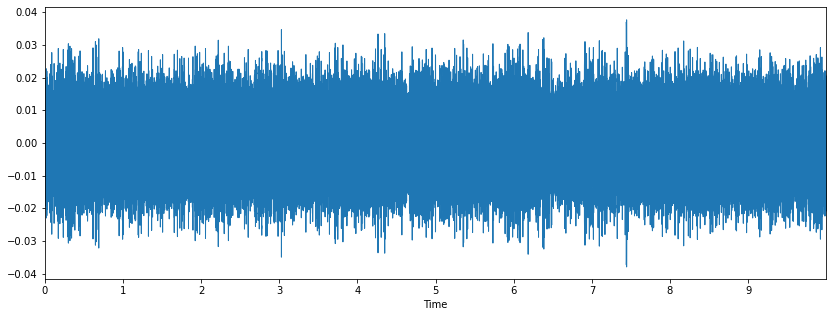

In [47]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [48]:
librosa.display.specshow?

In [49]:
plt.pcolormesh?

In [55]:
X = librosa.stft(x) # short time Ft
Xdb = librosa.amplitude_to_db(abs(X)) # does dB scaling of the spectro

Turns out librosa has a amp to dB scaling func for the spectrogram

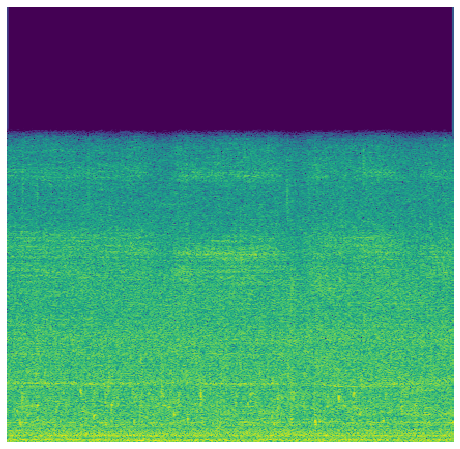

In [62]:
#display Spectrogram
plt.figure(figsize=(8, 8))
fig = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='viridis') 
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

Why does this look so much nicer than my other spectro. Also how to cut off the useless frequencies?

(20, 431)


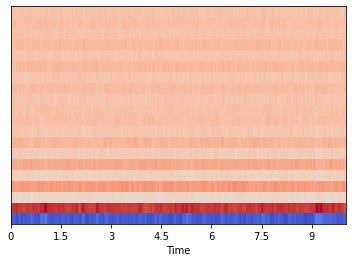

In [25]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape) #Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Save and crop or crop and save? Apparently I can't change the colormap of this one.